<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="taxi.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Taxi Fare Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

This case study is to predict the taxi fare for a taxi ride in New York City from a given pickup point to the agreed dropoff location. Decision tree and Random Forest regressor is used for the fare prediction.

## Data Definition

**unique_id**: Unique identifier or key for each record in the dataset - (string)    

**date_time_of_pickup**: time when the ride started - (timestamp)

**longitude_of_pickup**: Longitude of the taxi ride pickup point - (float) - (Numerical) 
 
**latitude_of_pickup**: Latitude of the taxi ride pickup point - (float) - (Numerical)
    
**longitude__of_dropoff**: Longitude of the taxi ride dropoff point  - (float) - (Numerical)
    
**latitude_of_dropoff**: Latitude of the taxi ride dropoff point - (float) - (Numerical)
    
**no_of_passenger**: count of the passengers during the ride - (integer) - (Numerical)
    
**amount**: (target variable)Has the respondent reduced time spent at large gatherings - (float) - (Numerical)
   

## Icon Legends
<table>
  <tr>
    <th width="25%"> <img src="infer.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
    <th width="25%"> <img src="quicktip.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from Outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets do it</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Quick Tips</b></font></div>
    </td>

</tr>

</table>

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Prepare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Type](#Data_Types)
        - 4.1.2 - [Feature Engineering](#Feature_Eng)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Correlation](#correlation)
        - 4.1.5 - [Discover Outliers](#outlier)
        - 4.1.6 - [Missing Values](#Missing_Values)        
    - 4.2 - [Exploratory Data Analysis](#EDA)
        - 4.2.1 - [Peak hours](#Peak)
        - 4.2.2 - [Mean fare for each hour during weekdays and weekends](#Mean_Fare)
        - 4.2.3 - [Distribution of key numerical variables](#Distribution)
5. **[Random Forest](#Random_Forest)**
    - 5.1 - [Random Forest Model](#RF_Model)
    - 5.2 - [Random Forest with GridSearchCV ](#RF_CV)
6. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us import the required libraries and functions.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

from math import radians, cos, sin, sqrt, asin

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [146]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete dataframe<br>
2. To set the decimal place of a numeric output to 6
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data.
                    </b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [148]:
# read csv file using pandas
df_taxi = pd.read_csv('TaxiFare.csv')

# display the top 5 rows of the dataframe
df_taxi.head()

# Note: To display more rows, example 10, use head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


The column `unique_id` contains the unique identifier for each observation, which is redundant for further analysis. Thus, we drop this column.

In [149]:
# drop the column 'Id' using drop()
# 'axis = 1' drops the specified column
df_taxi = df_taxi.drop('unique_id', axis = 1)

<a id='data_preparation'></a>
# 4. Prepare and Analyze the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <br>
                        2. Check the data types. If not as per business context, change the data types  <br>
                        3. Study Summary Statistics <br>
                        4. Distribution of Variables<br>
                        5. Analyze relationship between numeric variables <br>
                        6. Check for missing values<br>
                        7. Study correlation<br>
                        8. Analyze relationship between numeric and categoric variables <br><br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Data

**Let us now see the number of variables and observations in the data.**

In [150]:
# 'shape' returns the dimensions of the data
df_taxi.shape

(50000, 7)

We see the dataframe has 7 columns and 50000 rows. It means there are 7 variables and 50000 observations.

<a id='Data_Types'></a>
### 4.1.1 Data Type

Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to know whether the datatype aof each variable is correct, we do the following:<br><br>
                        1. Check the data type <br>
                        2. Change the incorrect data type <br>
                        3. Recheck the data type after the conversion <br>
                        4. Feature engineering <br>
                        5. Drop the redundant variables <br>
                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check the data type.**

In [151]:
# use 'dtypes' to check the data type of each variable
df_taxi.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='infer.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                <font color='#21618C'>
                    <b>From the above output, we see that the data type of 'date_time_of_pickup' is 'object '.<br>

But according to data definition, 'date_time_of_pickup 'is a date time stamp variable, which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




**2. Change the incorrect data type.**

In [152]:
# convert object to datetime using to_datetime method from pandas
#if error is set to'coerce', then invalid parsing will be set as NaT.
df_taxi.date_time_of_pickup = pd.to_datetime(df_taxi.date_time_of_pickup, errors='coerce')

**3. Recheck the data type after the conversion.**

In [153]:
# recheck the data type of each column
df_taxi.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now the data type of each variable is as per the data definition.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Feature_Eng'></a>
### 4.1.2 Feature Engineering

We will extract date time features from the variable 'date_time_of_pickup'.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For feature engineering, we do the following:<br><br>
                        1. Feature addition <br>
                        2. Drop the redundant variables <br>
                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Add new variables**

We will extract new features from variable `date_time_of_pickup` . We will also add a variable which measures the distance between the pickup and dropoff point.

In [154]:
# extract various date time components as seperate variables
df_taxi = df_taxi.assign(hour = df_taxi.date_time_of_pickup.dt.hour, 
                         day = df_taxi.date_time_of_pickup.dt.day,
                        month = df_taxi.date_time_of_pickup.dt.month, 
                        year = df_taxi.date_time_of_pickup.dt.year, 
                        dayofweek = df_taxi.date_time_of_pickup.dt.dayofweek)

We will add a new variable which measures the distance between the pickup and dropoff point. We will use the Haversine formula to compute the distance between two points of the journey, using the logitude and latitude values. 

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:  </b><a href="https://en.wikipedia.org/wiki/Haversine_formula"> What is Haversine </a>
</font>
            </div>
        </td>
    </tr>
</table>

In [155]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [156]:
#Add a new variable travel distance

df_taxi['travel_dist_km'] = distance_transform(df_taxi['longitude_of_pickup'].to_numpy(),
                                                df_taxi['latitude_of_pickup'].to_numpy(),
                                                df_taxi['longitude_of_dropoff'].to_numpy(),
                                                df_taxi['latitude_of_dropoff'].to_numpy()
                                              )

In [157]:
#Check the newly added vaiarbles
df_taxi.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.900000,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


**2. Drop the redundant variable.**

As we have extracted new features from variable `date_time_of_pickup` this variable is redundant for further analysis. Hence we drop this variable.

In [158]:
# drop the column 'date_time_of_pickup' using drop()
# 'axis = 1' drops the specified column

df_taxi = df_taxi.drop('date_time_of_pickup',axis=1)

In [159]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
 11  travel_dist_km        50000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.6 MB


As now have the required features, after having extracted new ones and dropping the redundant variables.

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for other variable types.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables use the describe(include='object')
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use the describe()**

In [160]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
# use .transpose() for better readability. However it is optional
df_taxi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,50000.000000,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.000000,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.000000,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.000000,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.000000,39.926251,6.014737,-74.006377,40.734371,40.753372,40.768167,43.415190
no_of_passenger,50000.000000,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
hour,50000.000000,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
day,50000.000000,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.000000,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
year,50000.000000,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br><br> 
 <br><br>Note that the minimum amount is -5 and maximum is 200. Ideally fare amount should not be less that 2.5 dollars, which is the minimum value set for fares in NYC. Also the minimum count of passengers is 0, which isn't a practical scenario. We will deal with such values as we progress the case study.
    </b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical variables, use the describe(include='object').**

As, there are no categorical varaibles, we skip this step.

<a id='correlation'></a>
### 4.1.4 Study correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Compute a correlation matrix**

In [161]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_taxi.corr()

# print the correlation matrix
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583,-0.022018,-0.001460,0.026876,0.120831,0.000520,0.015667
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604,0.004910,0.006001,0.000416,-0.001284,-0.003227,0.142805
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237,-0.004606,-0.006657,0.000711,-0.001334,0.003014,-0.125606
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936,0.005490,0.005135,0.001407,-0.000250,-0.002228,0.145640
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958,-0.004515,-0.007928,-0.000422,-0.001888,0.001424,-0.127274
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000,0.011350,0.006841,0.009175,0.006344,0.038583,-0.005588
hour,-0.022018,0.004910,-0.004606,0.005490,-0.004515,0.011350,1.000000,-0.008261,-0.001950,0.004104,-0.091310,0.000601
day,-0.001460,0.006001,-0.006657,0.005135,-0.007928,0.006841,-0.008261,1.000000,-0.017241,-0.011144,0.008500,0.010284
month,0.026876,0.000416,0.000711,0.001407,-0.000422,0.009175,-0.001950,-0.017241,1.000000,-0.115742,-0.009927,-0.008914
year,0.120831,-0.001284,-0.001334,-0.000250,-0.001888,0.006344,0.004104,-0.011144,-0.115742,1.000000,0.006907,0.022322


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the upper triangular entries using a heatmap.

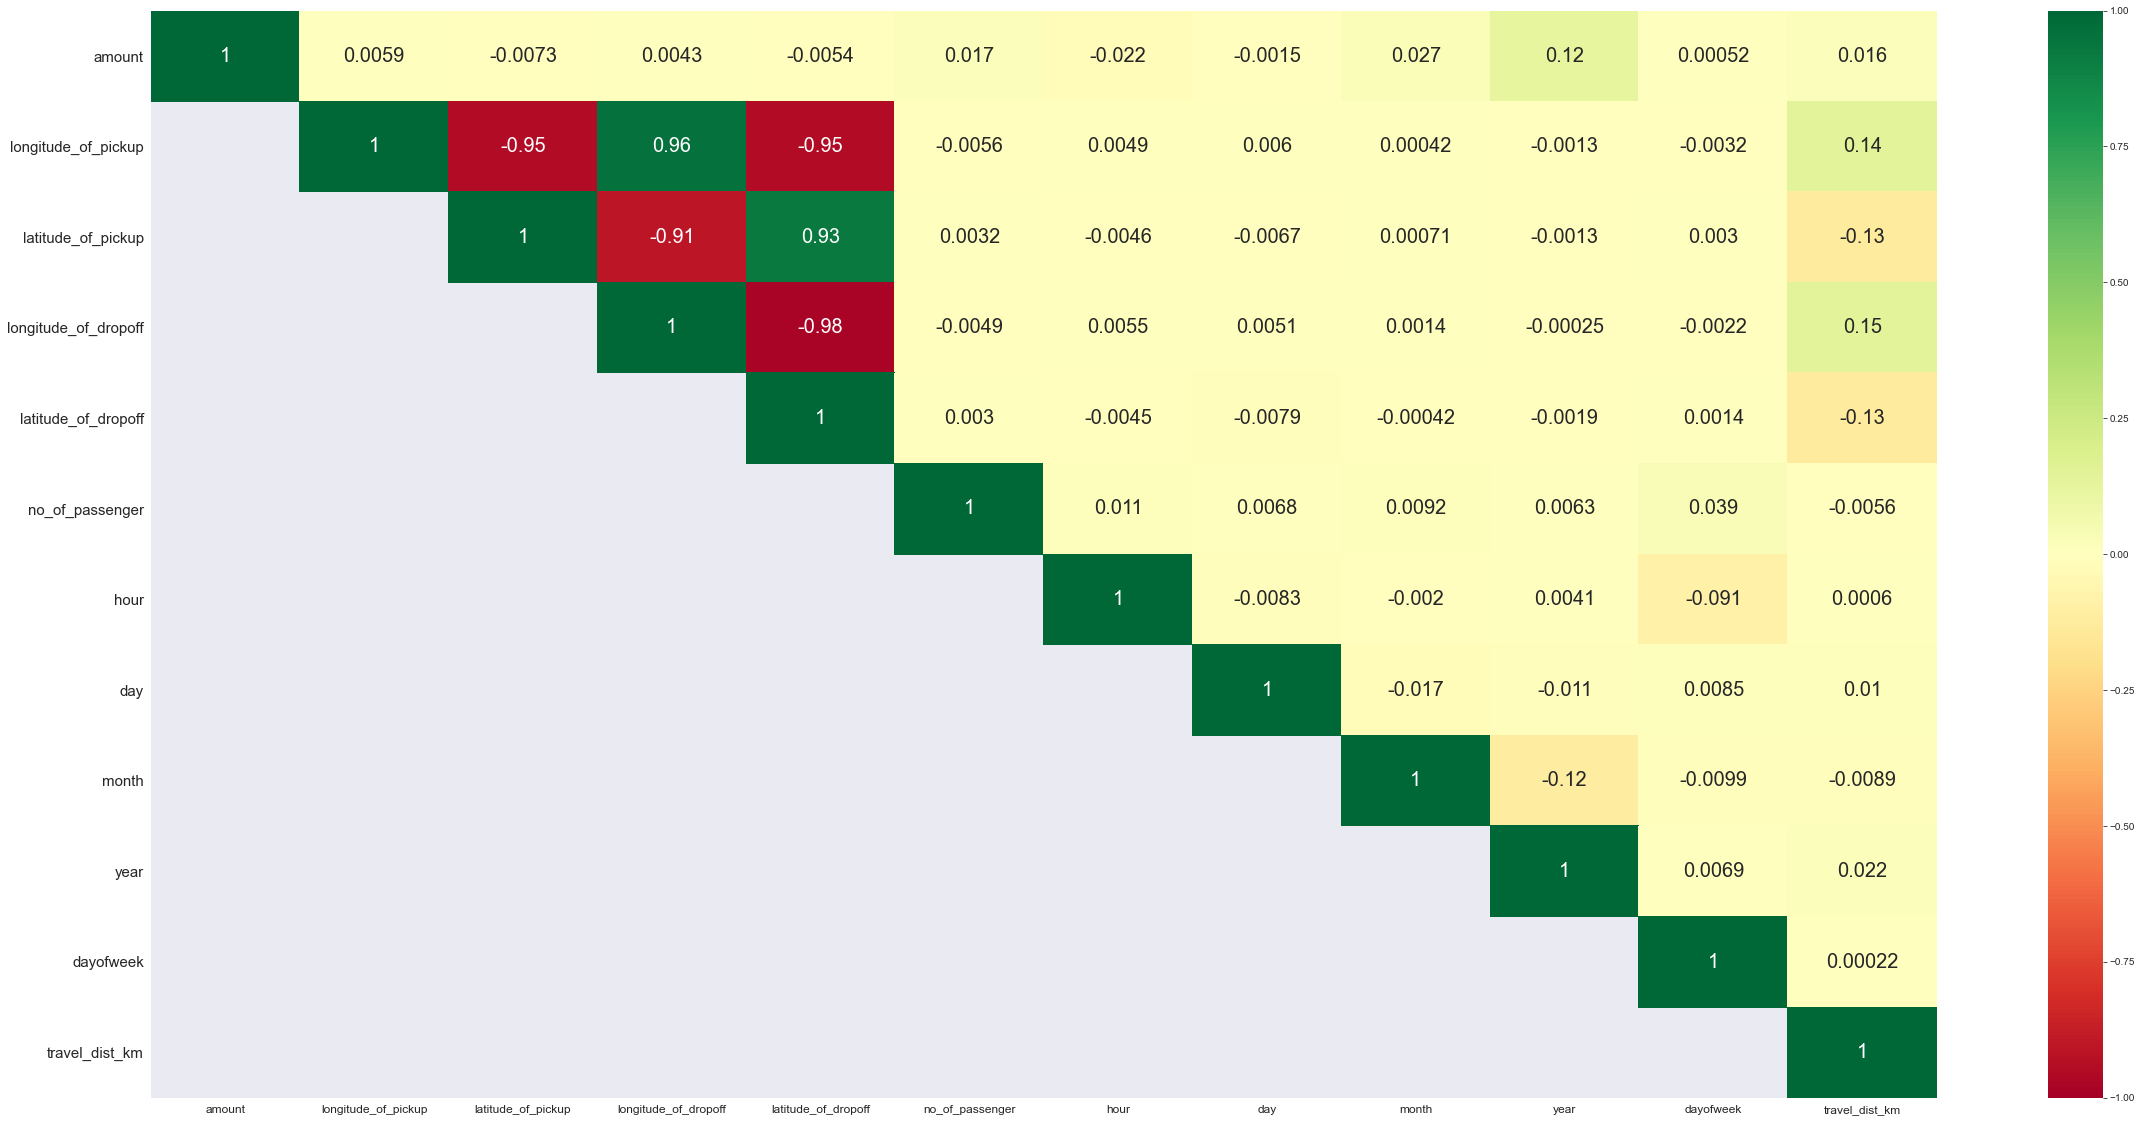

In [162]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (40,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The diagonal entries are all '1' which represents the correlation of the variable with itself. The dark green squares represent the variables with strong positive correlation. The dark red squares represent the variables with strong negative correlation. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

As the above correlation map is difficult to study. Create a heatmap that consider the variables with strong correlation.

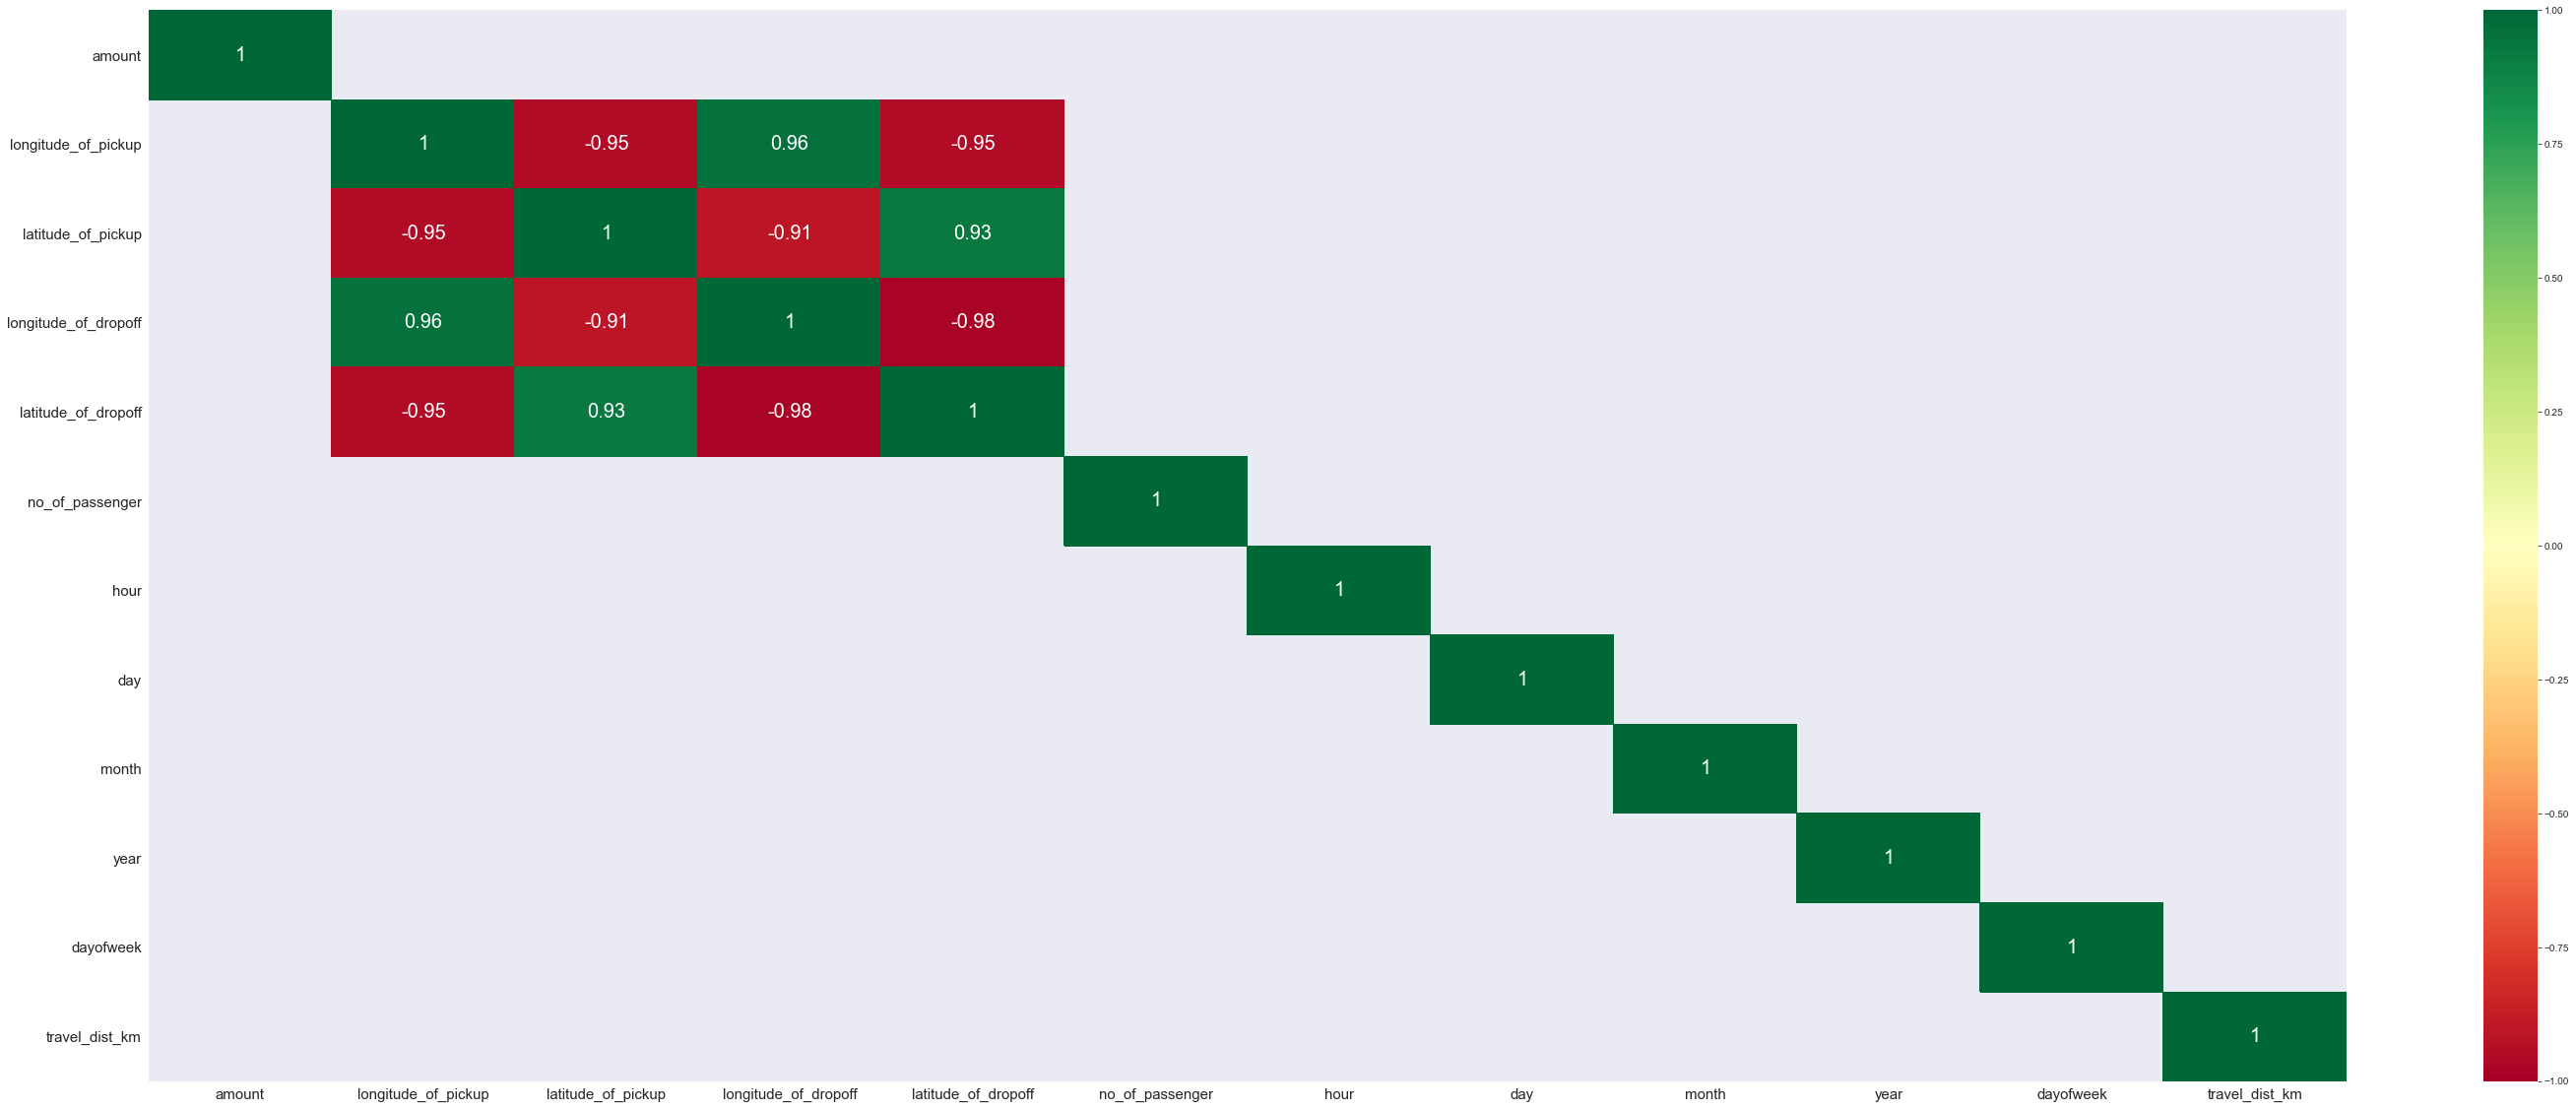

In [163]:
# set figure size
plt.figure(figsize=(50, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The above plot shows that there is highest positive correlation (= 0.96) between the variables 'longitude_of_pickup' and 'longitude_of_dropoff'. Also there is strong positive correlation between the pair latitude_of_pickup and latitude_of_dropoff. These variables may be involved in multicollinearity.<br>
                        Following variable pairs have strong negative correlation in the dataset(longitude_of_pickup,latitude_of_pickup), (latitude_of_dropoff,longitude_of_pickup),(longitude_of_dropoff,latitude_of_pickup) and (longitude_of_dropoff, latitude_of_dropoff).
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/2PBvA8T">Why correlation does not imply causation </a>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='outlier'></a>
### 4.1.5 Discover Outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.
Let us detect the extreme values in the data. 


The following can be considered as outliers in this case study:
1. Amount < 2.5
2. Distance outliers, i.e., trips with travel distance less than or equal to 0 and more than 130 Kms
3. Trips where 90< latitude <-90, 180 < longitude < -180                       

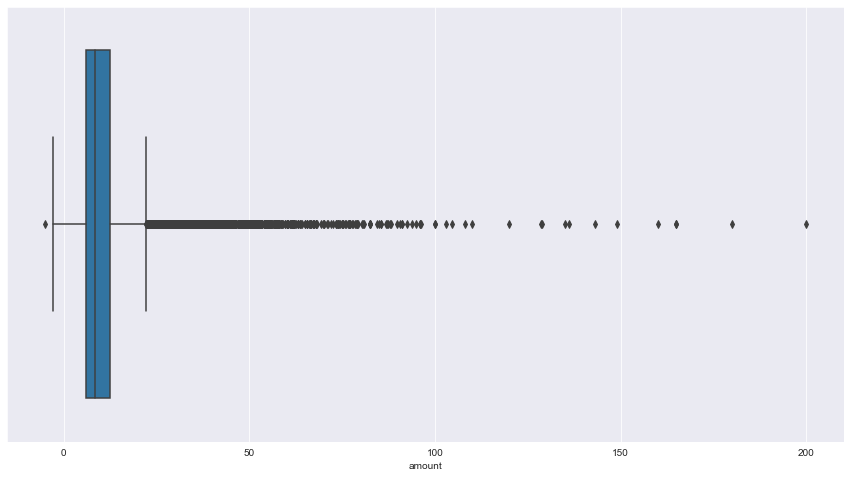

In [111]:
sns.boxplot(df_taxi['amount'])

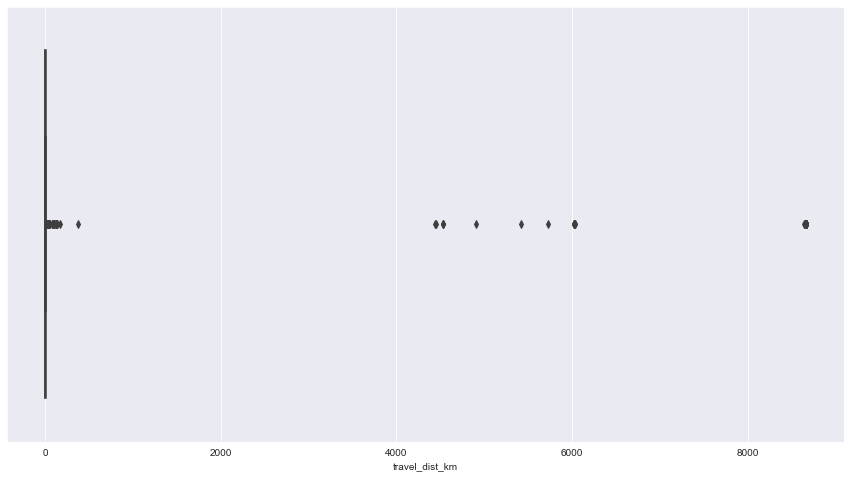

In [164]:
sns.boxplot(df_taxi['travel_dist_km'])

1. We have seen that there are instances of amount less that 0 as well in the data set, where as the minimum fare for any trip in NYC is 2.5 dollars, hence we will remove such observations. We have already seen that the max fare is 200 in the data set.

In [113]:
#We will only keep the observation where fare is between 2.5
df_taxi = df_taxi.loc[(df_taxi.amount >= 2.5)]

In [114]:
print("Remaining observastions in the dataset:", df_taxi.shape)

Remaining observastions in the dataset: (49990, 12)


2. Remove the observations with travel distance less than 0 and more than 130 kms.As seen from descriptive stats there are obs with tarvel distance more than 130 km, as that is the limit for trips in and around NYC

In [116]:
#We will only keep the observation where travel distance is greater than 0 and less than or equal to 130
df_taxi = df_taxi.loc[(df_taxi.travel_dist_km > 0) & (df_taxi.travel_dist_km <= 130)]
print("Remaining observastions in the dataset:", df_taxi.shape)

Remaining observastions in the dataset: (48447, 12)


3. Remove the observations with unreal longitude and latitude values , that is , 90< latitude <-90, 180 < longitude < -180.

In [117]:
incorrect_coordinates = df_taxi.loc[(df_taxi.latitude_of_pickup > 90) |(df_taxi.latitude_of_pickup < -90) |
                                   (df_taxi.latitude_of_dropoff > 90) |(df_taxi.latitude_of_dropoff < -90) |
                                   (df_taxi.longitude_of_pickup > 180) |(df_taxi.longitude_of_pickup < -180) |
                                   (df_taxi.longitude_of_dropoff > 90) |(df_taxi.longitude_of_dropoff < -90)
                                    ].index

In [118]:
df_taxi.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [119]:
print("Remaining observastions in the dataset:", df_taxi.shape)

Remaining observastions in the dataset: (48446, 12)


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The number of observations is reduced to 48446 from 50000 which suggests that we have removed the observations with extreme or immpractical values.
                    </b>   
                </font>
            </div>
        </td>
    </tr>
</table>



<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:  </b><a href="https://bit.ly/33bgNpq">How to use statistics to identify outliers in data</a>
</font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column.<br><br>
                        <ol type="1"><li>Check the missing values</li>
                            <li>Visualize missing values using heatmap</li>
                            <li>Handle missing values
                            <ul type="i">
                                <li>For numeric variables</li>
                                <li> For categoric variables</li>
                            </ul>
                        </ol>  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check the missing values**

In [121]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_taxi.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_taxi.isnull().sum()*100/df_taxi.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df_taxi[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
travel_dist_km,0,0.000000,float64
dayofweek,0,0.000000,int64
year,0,0.000000,int64
month,0,0.000000,int64
day,0,0.000000,int64
hour,0,0.000000,int64
no_of_passenger,0,0.000000,int64
latitude_of_dropoff,0,0.000000,float64
longitude_of_dropoff,0,0.000000,float64
latitude_of_pickup,0,0.000000,float64


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>None of the variables contain missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Visualize missing values using heatmap**

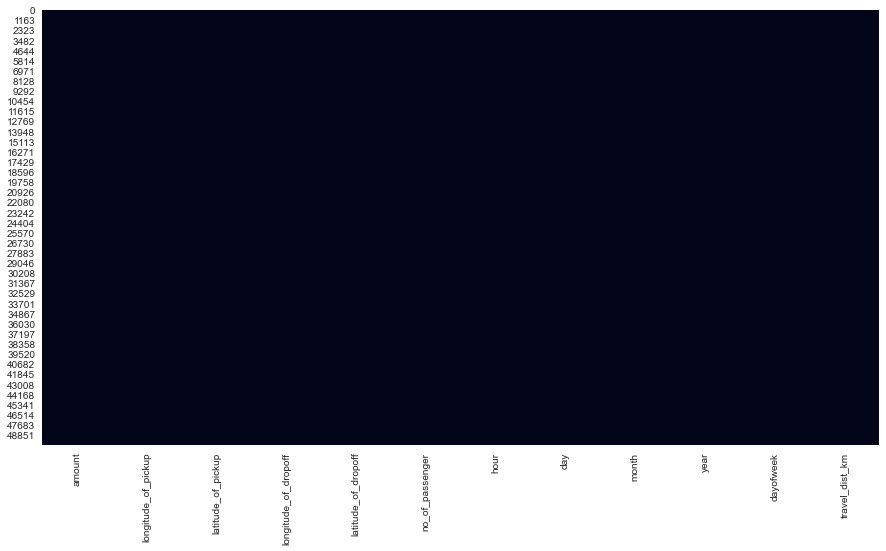

In [122]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df_taxi.isnull(), cbar=False)

# display the plot
plt.show()

If there are missing values in a dataset then the horizontal lines in the heatmap correspond to the missing values. Since there are no missing values here there are no horizontal lines corresponding to them.

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above plot shows that there are no missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='EDA'></a>
## 4.2 Exploratory Data Analysis

<a id='Peak'></a>
### 4.2.1 Peak hours

We will check for the business during the weekdays and weekends.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We will check the peak hours during the following: <br><br>
                        1. Weekdays <br>
                        2. Weekends <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot a countplot to check the peak hours during weekdays**

To plot a countplot, we use the `countplot()` from the seaborn library.

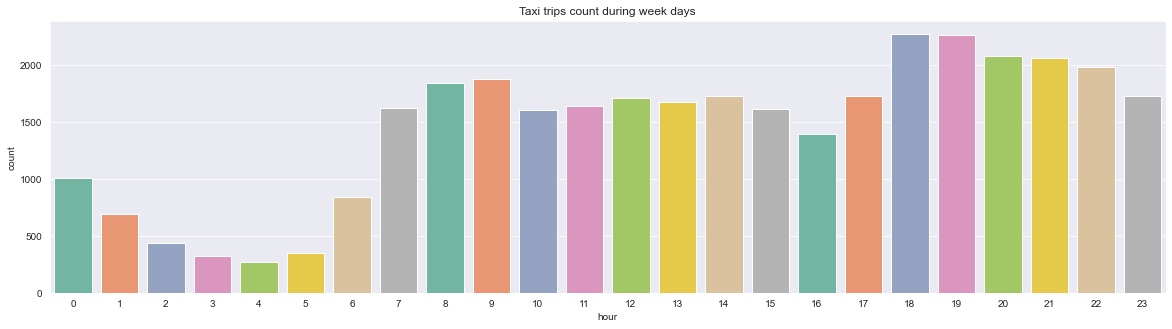

In [123]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week days')
sns.set_style("white")
#plot the countplot for weekdays
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <=4)], palette='Set2')

We see that during the weekdays the count of trips start to peak from 8 am and is highest at 9am. In the evening the peak is at 6pm and 7pm.

**2. Plot a countplot to check the peak hours during weekends**

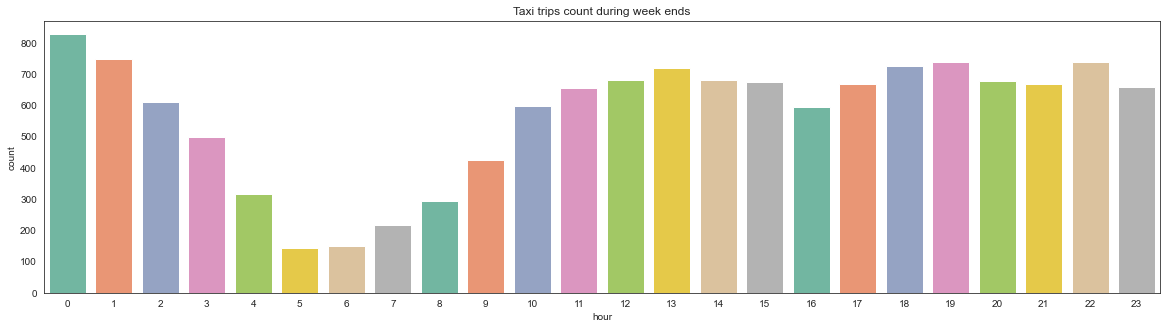

In [124]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week ends')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <=6)], palette='Set2')

We see that during the weekends the count of trips is high after 12 midnight to 3am to 4am. This pattern is different from the weekdays. In the evening the demand is almost evenly high after 6pm till late night except a slight dip at 8pm and 9pm.

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can notice that the pattern for demand of taxi is different for weekdays and weekends.</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Mean_Fare'></a>
### 4.2.2 Mean fare for each hour during weekdays and weekends

We will check the mean fares for each hour during the weekdays and weekends.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We will do the following: <br><br>
                        1. Compute the mean hourly fare for weekdays and weekends <br>
                        2. Plot the bar graph for the same <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Compute the hourly mean fare for weekdays and weekends**

In [125]:
# Set the days in the dataset as week days and week ends
week_days = df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <= 4)]
week_ends = df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <= 6)]

# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

In [126]:
week_days_fare.head()

,hour,amount
0,0,12.050100
1,1,12.142058
2,2,10.918159
3,3,11.927210
4,4,14.777664


In [127]:
week_ends.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
10,5.300000,-73.996335,40.737142,-73.980721,40.733559,1,7,8,4,2012,6,1.374577
19,4.000000,-73.979815,40.751902,-73.979446,40.755481,1,20,6,12,2014,5,0.399179
29,4.500000,-73.981020,40.737760,-73.980668,40.730497,2,0,11,8,2013,6,0.808153
31,22.540000,-74.010483,40.717667,-73.985771,40.660366,1,21,21,6,2015,6,6.703552


**2. Plot the mean fare**

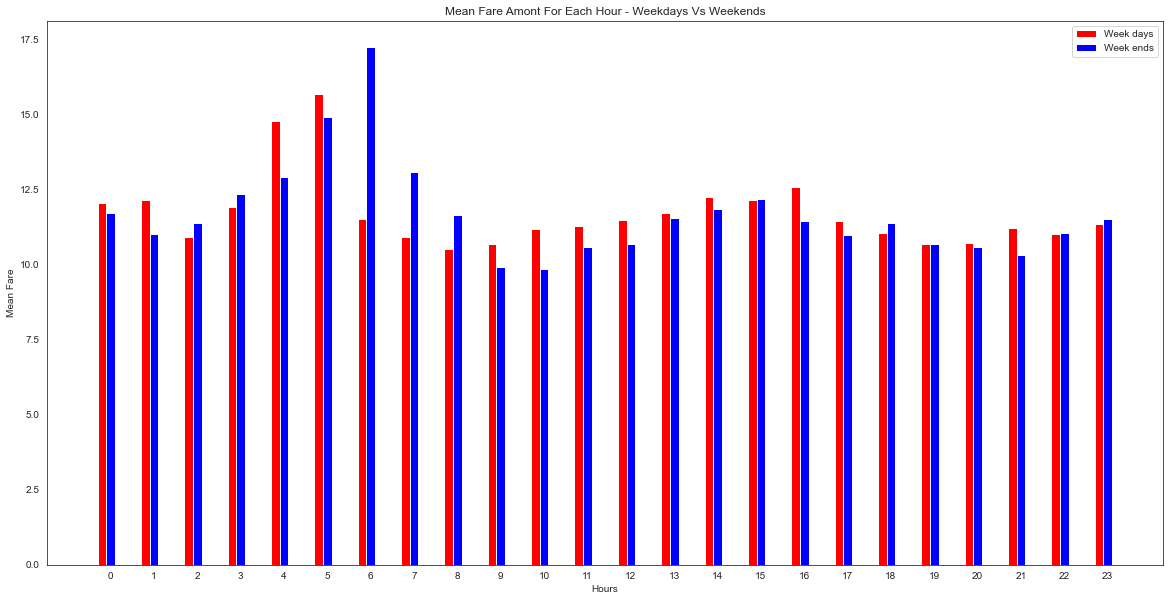

In [128]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare 
y = np.array(week_days_fare.amount)
# an array of week end fare
z = np.array(week_ends_fare.amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amont For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()


We notice that the mean fares for each hour are different for week days and week ends. Mean fare for weekdays during morning hours 6,7 and 8 is much less compared to weekends.

<a id='Distribution'></a>
### 4.2.3 Distribution of key numerical vairables

We will check the distribustion of 'travel_dist_km' and 'amount'

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We will check the distribution of the following variables: <br><br>
                        1. 'amount' <br>
                        2. 'travel_dist_km' <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Distribution of fare 'amount'**

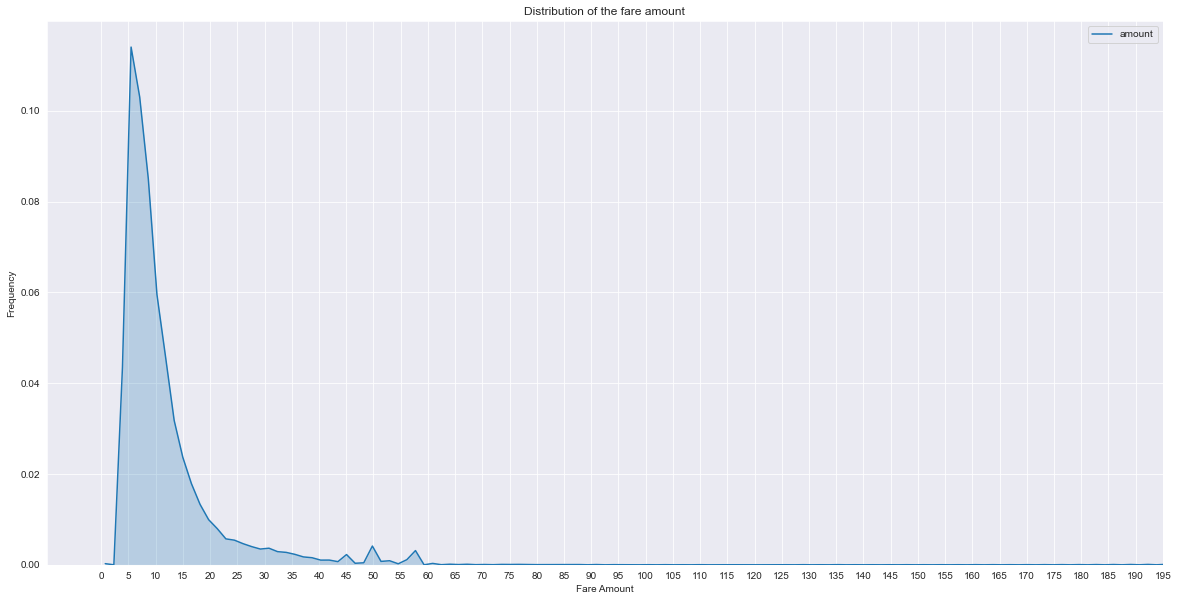

In [129]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(df_taxi.amount, shade=True)


We can see that most the trips have a fare amount of 2 to 20 dollars. There are a few small peaks around 50 and 58 dollars as well.

**2. Distribustion of the travel distance in km**

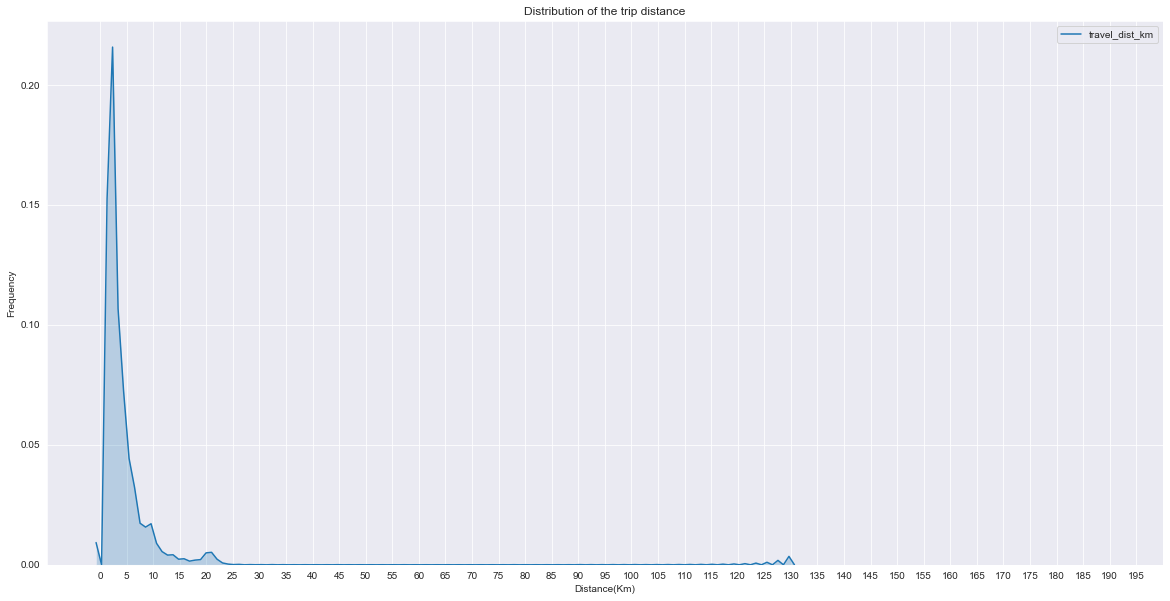

In [130]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

sns.plot = sns.kdeplot(df_taxi[df_taxi.travel_dist_km<600].travel_dist_km, shade=True)

We can see that most the trips have a travel distance of 2.5 km to 25 km. There are a few instances of 0 km as well.

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We have generated new features, removed redundant features and removed the outliers.
<br>                    
We now progress to build the model.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Random_Forest'></a>
# 5.  Random Forest

It is an example of the `Bagging` technique. It constructs multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees.

<a id='RF_Model'></a>
## 5.1 Random Forest Model

In this section we build a model using random forest regressor.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br><br>
                       1. Split the features and target into seperate data frames<br>
                       2. Split the data into training and test sets<br>
                       3. Build model<br>
                       4. Predict the values using test set <br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Split the data into features and target dataframes**

Store the amount variable which is the target variable, into y.

In [131]:
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df_taxi['amount'])

Now, use this 'y' as a target variable to build the classification models.

In [133]:
# use 'drop()' to remove the variable 'amount' from df_taxi
# 'axis = 1' drops the corresponding column(s)
X = df_taxi.drop('amount',axis = 1)

In [134]:
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


Use this 'X' as a set of predictors to build the model.

**2. Split the data into training and test sets**

In [135]:

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (33912, 11)
The shape of X_test is: (14534, 11)
The shape of y_train is: (33912, 1)
The shape of y_test is: (14534, 1)


**2. Build model using RandomForestRegressor**

In [136]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train

RandomForestRegressor(random_state=10)

**3. Predict the values using test set**

In [137]:
# predict the values on test dataset using predict()
y_pred = rf_reg.predict(X_test)

**4. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [138]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 1.8483524012659969
Mean Squared Error (MSE): 11.964305175344709
Root Mean Squared Error (RMSE): 3.4589456739510536


**5. Tabulate the results**

In [139]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,1.848352,11.964305,3.458946


<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us also take a look at building a random forest model with grid search.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='RF_CV'></a>
## 5.2 Random Forest with GridSearchCV

Now we show how a decision tree is optimized by cross-validation, which is done using the `GridSearchCV()` from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we build a random forest using the GridSearchCV. We start with our original data set gradually proceeding with our analysis<br><br>
                        To build a Random Forest using GridSearchCV, we do the following:<br>
                        1. Use GridSearch to obtain the optimal values of hyperparameters <br>
                        2. Build the model using the hyperparameters obtained in step 1<br>
                        3. Do predictions on the test set<br>
                        4. Compute accuracy measures <br>
                        5. Tabulate the results <br>                     
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Use GridSearch to obtain the optimal values of hyperparameters**

In [141]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10]
                     #'min_samples_leaf': [5,10],
                     #'max_leaf_nodes': [10, 15]
                    }]

As an exercise you may uncomment the other two parameters min_samples_leaf and max_leaf_nodes and further tune the model.

In [142]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 85} 



**2. Build the model using the hyperparameters obtained in step 1**

In [143]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       #max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       #min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

As an exercise you may uncomment the other two parameters min_samples_leaf and max_leaf_nodes and further tune the model.

**3. Predict the values using test set**

In [144]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(X_test)

**4. Compute accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [46]:
# calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 1.8948977906216495
Mean Squared Error (MSE): 12.051032937348774
Root Mean Squared Error (RMSE): 3.4714597703774093


**5. Tabulate the results**

In [47]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_CV_MAE,
                     'MSE': rf_reg_CV_MSE,
                     'RMSE': rf_reg_CV_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,1.846434,11.856457,3.443321
1,Random Forest,1.894898,12.051033,3.471460


<a id="conclusion"> </a>
# 6. Conclusion and Interpretation

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The regression algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using MAE, MSE,RMSE. <br><br>
                        The above result shows that the RMSE value for both the model is much less than half the standard deviation of the 'amount' (target) variable. Both the models have performed well. We can further fine tune the model for various hyperparameter values, however, we need to make sure we dont overfit.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>